<img src = "https://global-uploads.webflow.com/5f0d53c042a9ed6288de7f8d/5f6337ae2cfaa10946ceeb06_Hacktiv8%20logo%20horizontal%2001%20black-p-500.png" width = 400>
<h1 align=center><font size = 5>Hacktiv8 PTP Introduction to Data Science Projects 2 // Statistical Treatment for Datasets</font></h1>

Title: Hacktiv8 PTP Introduction to Data Science Projects 2: Statistical Treatment for Datasets Starter Notebook\
Last Updated: September 20, 2020\
Author: Raka Ardhi

## NYC Property Sales Introduction

The aim of this projects is to introduce you to practical statistic with Python as concrete and as consistent as possible. Using what you’ve learned; download the NYC Property Sales Dataset from Kaggle. This dataset is a record of every building or building unit (apartment, etc.) sold in the New York City property market over a 12-month period.

This dataset contains the location, address, type, sale price, and sale date of building units sold. A reference on the trickier fields:

* `BOROUGH`: A digit code for the borough the property is located in; in order these are Manhattan (1), Bronx (2), Brooklyn (3), Queens (4), and Staten Island (5).
* `BLOCK`; `LOT`: The combination of borough, block, and lot forms a unique key for property in New York City. Commonly called a BBL.
* `BUILDING CLASS AT PRESENT` and `BUILDING CLASS AT TIME OF SALE`: The type of building at various points in time.

Note that because this is a financial transaction dataset, there are some points that need to be kept in mind:

* Many sales occur with a nonsensically small dollar amount: $0 most commonly. These sales are actually transfers of deeds between parties: for example, parents transferring ownership to their home to a child after moving out for retirement.
* This dataset uses the financial definition of a building/building unit, for tax purposes. In case a single entity owns the building in question, a sale covers the value of the entire building. In case a building is owned piecemeal by its residents (a condominium), a sale refers to a single apartment (or group of apartments) owned by some individual.

Formulate a question and derive a statistical hypothesis test to answer the question. You have to demonstrate that you’re able to make decisions using data in a scientific manner. Examples of questions can be:

* Is there a difference in unit sold between property built in 1900-2000 and 2001 so on?
* Is there a difference in unit sold based on building category?
* What can you discover about New York City real estate by looking at a year's worth of raw transaction records? Can you spot trends in the market?

Please make sure that you have completed the lesson for this course, namely Python and Practical Statistics which is part of this Program.

**Note:** You can take a look at Project Rubric below:

| Code Review |  |
| :--- | :--- |
| CRITERIA | SPECIFICATIONS |
| Mean | Student implement mean to specifics column/data using pandas, numpy, or scipy|
| Median | Student implement median to specifics column/data using pandas, numpy, or scipy|
| Modus | Student implement modus to specifics column/data using pandas, numpy, or scipy|
| Central Tendencies | Implementing Central Tendencies through dataset |
| Box Plot | Implementing Box Plot to visualize spesific data |
| Z-Score | Implementing Z-score concept to specific data |
| Probability Distribution | Student analyzing distribution of data and gain insight from the distribution |
| Intervals | Implementing Confidence or Prediction Intervals |
| Hypotesis Testing | Made 1 Hypotesis and get conclusion from data |
| Preprocessing | Student preprocess dataset before applying the statistical treatment. |
| Does the code run without errors? | The code runs without errors. All code is functional and formatted properly. |

| Readability |  |
| :--- | :--- |
| CRITERIA | SPECIFICATIONS |
| Well Documented | All cell in notebook are well documented with markdown above each cell explaining the code|

| Analysis |  |
| :--- | :--- |
| CRITERIA | SPECIFICATIONS |
|Overall Analysis| Gain an insight/conclusion of overall plots that answer the hypotesis |

**Focus on "Graded-Function" sections.**

------------

## Data Preparation

Load the library you need.

Get your NYC property data from [here](https://www.kaggle.com/new-york-city/nyc-property-sales) and load the dataframe to your notebook.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import scipy.stats as scistats
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
data_property = pd.read_csv('nyc-rolling-sales.csv')

Let's view the top 5 rows of the dataset using the `head()` function.

In [3]:
data_property.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


We can also veiw the bottom 5 rows of the dataset using the `tail()` function.

In [4]:
data_property.tail()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
84543,8409,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,,B9,37 QUAIL LANE,...,2,0,2,2400,2575,1998,1,B9,450000,2016-11-28 00:00:00
84544,8410,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,,B9,32 PHEASANT LANE,...,2,0,2,2498,2377,1998,1,B9,550000,2017-04-21 00:00:00
84545,8411,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,,B2,49 PITNEY AVENUE,...,2,0,2,4000,1496,1925,1,B2,460000,2017-07-05 00:00:00
84546,8412,5,WOODROW,22 STORE BUILDINGS,4,7100,28,,K6,2730 ARTHUR KILL ROAD,...,0,7,7,208033,64117,2001,4,K6,11693337,2016-12-21 00:00:00
84547,8413,5,WOODROW,35 INDOOR PUBLIC AND CULTURAL FACILITIES,4,7105,679,,P9,155 CLAY PIT ROAD,...,0,1,1,10796,2400,2006,4,P9,69300,2016-10-27 00:00:00


BOROUGH: A digit code for the borough the property is located in; in order these are Manhattan (1), Bronx (2), Brooklyn (3), Queens (4), and Staten Island (5).

To view the dimensions of the dataframe, we use the `.shape` parameter. Expected result: (84548, 22)

In [5]:
data_property.shape
data_property.columns

Index(['Unnamed: 0', 'BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY',
       'TAX CLASS AT PRESENT', 'BLOCK', 'LOT', 'EASE-MENT',
       'BUILDING CLASS AT PRESENT', 'ADDRESS', 'APARTMENT NUMBER', 'ZIP CODE',
       'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS',
       'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT',
       'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE',
       'SALE PRICE', 'SALE DATE'],
      dtype='object')

According to this official page, Ease-ment is "is a right, such as a right of way, which allows an entity to make limited use of another’s real property. For example: MTA railroad tracks that run across a portion of another property". Also, the Unnamed column is not mentioned and was likely used for iterating through records. So, those two columns are removed for now.

Drop kolom 'Unnamed: 0','EASE-MENT','ADDRESS','APARTMENT NUMBER'.

In [6]:
data_property.drop(['Unnamed: 0','EASE-MENT','ADDRESS','APARTMENT NUMBER'],axis=1,inplace=True)
data_property.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,10009,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,C7,10009,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,C7,10009,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,10009,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,10009,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


Let's view Dtype of each features in dataframe using `.info()` function.

In [7]:
data_property.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   BOROUGH                         84548 non-null  int64 
 1   NEIGHBORHOOD                    84548 non-null  object
 2   BUILDING CLASS CATEGORY         84548 non-null  object
 3   TAX CLASS AT PRESENT            84548 non-null  object
 4   BLOCK                           84548 non-null  int64 
 5   LOT                             84548 non-null  int64 
 6   BUILDING CLASS AT PRESENT       84548 non-null  object
 7   ZIP CODE                        84548 non-null  int64 
 8   RESIDENTIAL UNITS               84548 non-null  int64 
 9   COMMERCIAL UNITS                84548 non-null  int64 
 10  TOTAL UNITS                     84548 non-null  int64 
 11  LAND SQUARE FEET                84548 non-null  object
 12  GROSS SQUARE FEET               84548 non-null

It looks like empty records are not being treated as NA. We convert columns to their appropriate data types to obtain NAs.

In [8]:
data_property.isna().sum()

BOROUGH                           0
NEIGHBORHOOD                      0
BUILDING CLASS CATEGORY           0
TAX CLASS AT PRESENT              0
BLOCK                             0
LOT                               0
BUILDING CLASS AT PRESENT         0
ZIP CODE                          0
RESIDENTIAL UNITS                 0
COMMERCIAL UNITS                  0
TOTAL UNITS                       0
LAND SQUARE FEET                  0
GROSS SQUARE FEET                 0
YEAR BUILT                        0
TAX CLASS AT TIME OF SALE         0
BUILDING CLASS AT TIME OF SALE    0
SALE PRICE                        0
SALE DATE                         0
dtype: int64

In [9]:
#First, let's check which columns should be categorical
print('Column name')
for col in data_property.columns:
    if data_property[col].dtype=='object':
        print(col, data_property[col].nunique())

Column name
NEIGHBORHOOD 254
BUILDING CLASS CATEGORY 47
TAX CLASS AT PRESENT 11
BUILDING CLASS AT PRESENT 167
LAND SQUARE FEET 6062
GROSS SQUARE FEET 5691
BUILDING CLASS AT TIME OF SALE 166
SALE PRICE 10008
SALE DATE 364


In [10]:
# LAND SQUARE FEET,GROSS SQUARE FEET, SALE PRICE, BOROUGH should be numeric. 
# SALE DATE datetime format.
# categorical: NEIGHBORHOOD, BUILDING CLASS CATEGORY, TAX CLASS AT PRESENT, BUILDING CLASS AT PRESENT,
# BUILDING CLASS AT TIME OF SALE, TAX CLASS AT TIME OF SALE,BOROUGH 

numer = ['LAND SQUARE FEET','GROSS SQUARE FEET', 'SALE PRICE', 'BOROUGH']
for col in numer: # coerce for missing values
    data_property[col] = pd.to_numeric(data_property[col], errors='coerce')

categ = ['NEIGHBORHOOD', 'BUILDING CLASS CATEGORY', 'TAX CLASS AT PRESENT', 'BUILDING CLASS AT PRESENT', 'BUILDING CLASS AT TIME OF SALE', 'TAX CLASS AT TIME OF SALE']
for col in categ:
    data_property[col] = data_property[col].astype('category')

data_property['SALE DATE'] = pd.to_datetime(data_property['SALE DATE'], errors='coerce')

In [11]:
data_property.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   BOROUGH                         84548 non-null  int64         
 1   NEIGHBORHOOD                    84548 non-null  category      
 2   BUILDING CLASS CATEGORY         84548 non-null  category      
 3   TAX CLASS AT PRESENT            84548 non-null  category      
 4   BLOCK                           84548 non-null  int64         
 5   LOT                             84548 non-null  int64         
 6   BUILDING CLASS AT PRESENT       84548 non-null  category      
 7   ZIP CODE                        84548 non-null  int64         
 8   RESIDENTIAL UNITS               84548 non-null  int64         
 9   COMMERCIAL UNITS                84548 non-null  int64         
 10  TOTAL UNITS                     84548 non-null  int64         
 11  LA

Our dataset is ready for checking missing values.

In [12]:
missing = data_property.isnull().sum()/len(data_property)*100

print(pd.DataFrame([missing[missing>0],pd.Series(data_property.isnull().sum()[data_property.isnull().sum()>1000])],
                   index=['percent missing','how many missing']))

                  LAND SQUARE FEET  GROSS SQUARE FEET   SALE PRICE
percent missing          31.049818          32.658372     17.22217
how many missing      26252.000000       27612.000000  14561.00000


Around 30% of GROSS SF and LAND SF are missing. Furthermore, around 17% of SALE PRICE is also missing.

We can fill in the missing value from one column to another, which will help us reduce missing values. Expected values:

(6, 20)

(1366, 20)

In [13]:
print(data_property[(data_property['LAND SQUARE FEET'].isnull()) & (data_property['GROSS SQUARE FEET'].notnull())].shape)
print(data_property[(data_property['LAND SQUARE FEET'].notnull()) & (data_property['GROSS SQUARE FEET'].isnull())].shape)

(6, 18)
(1366, 18)


In [14]:
data_property.isna().sum()

BOROUGH                               0
NEIGHBORHOOD                          0
BUILDING CLASS CATEGORY               0
TAX CLASS AT PRESENT                  0
BLOCK                                 0
LOT                                   0
BUILDING CLASS AT PRESENT             0
ZIP CODE                              0
RESIDENTIAL UNITS                     0
COMMERCIAL UNITS                      0
TOTAL UNITS                           0
LAND SQUARE FEET                  26252
GROSS SQUARE FEET                 27612
YEAR BUILT                            0
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                        14561
SALE DATE                             0
dtype: int64

There are 1372 rows that can be filled in with their approximate values.

In [15]:
data_property['LAND SQUARE FEET'] = data_property['LAND SQUARE FEET'].mask((data_property['LAND SQUARE FEET'].isnull()) & (data_property['GROSS SQUARE FEET'].notnull()), data_property['GROSS SQUARE FEET'])
data_property['GROSS SQUARE FEET'] = data_property['GROSS SQUARE FEET'].mask((data_property['LAND SQUARE FEET'].notnull()) & (data_property['GROSS SQUARE FEET'].isnull()), data_property['LAND SQUARE FEET'])

In [16]:
print(sum(data_property.duplicated()))

956


In [17]:
#  Check for duplicates before

print('Data duplikat:' , sum(data_property.duplicated()))

data_property[data_property.duplicated(keep=False)].sort_values(['NEIGHBORHOOD']).head(10)

# data_property.duplicated() automatically excludes duplicates, to keep duplicates in df we use keep=False

# in data_property.duplicated(df.columns) we can specify column names to look for duplicates only in those mentioned columns.

Data duplikat: 956


,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
48,1,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,396,20,C6,10009,0,0,0,NaN,NaN,1920,2,C6,NaN,2017-03-20
49,1,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,396,20,C6,10009,0,0,0,NaN,NaN,1920,2,C6,NaN,2017-03-20
76286,5,ANNADALE,02 TWO FAMILY DWELLINGS,1,6350,7,B2,10312,2,0,2,8000.0,4208.0,1985,1,B2,NaN,2017-06-27
76322,5,ANNADALE,05 TAX CLASS 1 VACANT LAND,1B,6459,28,V0,0,0,0,0,6667.0,6667.0,0,1,V0,NaN,2017-05-11
76323,5,ANNADALE,05 TAX CLASS 1 VACANT LAND,1B,6459,28,V0,0,0,0,0,6667.0,6667.0,0,1,V0,NaN,2017-05-11
76287,5,ANNADALE,02 TWO FAMILY DWELLINGS,1,6350,7,B2,10312,2,0,2,8000.0,4208.0,1985,1,B2,NaN,2017-06-27
76384,5,ARDEN HEIGHTS,01 ONE FAMILY DWELLINGS,1,5741,93,A5,10312,1,0,1,500.0,1354.0,1996,1,A5,320000.0,2017-06-06
76383,5,ARDEN HEIGHTS,01 ONE FAMILY DWELLINGS,1,5741,93,A5,10312,1,0,1,500.0,1354.0,1996,1,A5,320000.0,2017-06-06
76643,5,ARROCHAR,02 TWO FAMILY DWELLINGS,1,3103,57,B2,10305,2,0,2,5000.0,2733.0,1925,1,B2,NaN,2017-03-21
76644,5,ARROCHAR,02 TWO FAMILY DWELLINGS,1,3103,57,B2,10305,2,0,2,5000.0,2733.0,1925,1,B2,NaN,2017-03-21


The dataframe has 765 duplicated rows (exluding the original rows).

In [18]:
data_property.drop_duplicates(inplace=True)

print('Data duplikat:' , sum(data_property.duplicated()))

Data duplikat: 0


In [19]:
data_property.isna().sum()

BOROUGH                               0
NEIGHBORHOOD                          0
BUILDING CLASS CATEGORY               0
TAX CLASS AT PRESENT                  0
BLOCK                                 0
LOT                                   0
BUILDING CLASS AT PRESENT             0
ZIP CODE                              0
RESIDENTIAL UNITS                     0
COMMERCIAL UNITS                      0
TOTAL UNITS                           0
LAND SQUARE FEET                  25949
GROSS SQUARE FEET                 25949
YEAR BUILT                            0
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                        14074
SALE DATE                             0
dtype: int64

Masih ada missing value disana. Kita akan menghilangkan missing value pada kolom 'LAND SQUARE FEET', 'GROSS SQUARE FEET'.

In [20]:
float_columns = ['LAND SQUARE FEET', 'GROSS SQUARE FEET']
for float_col in float_columns:
    data_property[float_col].fillna(data_property[float_col].median(),inplace=True)

Missing value pada kolom SALE PRICE di-drop saja karena tidak bermakna.

In [21]:
data_property.dropna(inplace=True)

In [22]:
data_property.isnull().sum()

BOROUGH                           0
NEIGHBORHOOD                      0
BUILDING CLASS CATEGORY           0
TAX CLASS AT PRESENT              0
BLOCK                             0
LOT                               0
BUILDING CLASS AT PRESENT         0
ZIP CODE                          0
RESIDENTIAL UNITS                 0
COMMERCIAL UNITS                  0
TOTAL UNITS                       0
LAND SQUARE FEET                  0
GROSS SQUARE FEET                 0
YEAR BUILT                        0
TAX CLASS AT TIME OF SALE         0
BUILDING CLASS AT TIME OF SALE    0
SALE PRICE                        0
SALE DATE                         0
dtype: int64

Data sudah bersih dari missing value dan siap untuk dilakukan data analysis.

## Exploratory data analysis

Now, let's get a simple descriptive statistics with `.describe()` function for `COMMERCIAL UNITS` features.

In [23]:
data_property[data_property['COMMERCIAL UNITS']==0].describe()

,BOROUGH,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE
count,65550.000000,65550.00000,65550.000000,65550.00000,65550.000000,65550.0,65550.000000,6.555000e+04,6.555000e+04,65550.000000,6.555000e+04
mean,2.926224,4223.58476,393.158505,10729.46267,1.610755,0.0,1.632815,2.696044e+03,2.227634e+03,1791.973791,9.960847e+05
std,1.250433,3455.17085,669.189183,1292.13776,8.547839,0.0,8.544943,2.534464e+04,2.323410e+04,533.845651,3.331082e+06
min,1.000000,1.00000,1.000000,0.00000,0.000000,0.0,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00
25%,2.000000,1349.00000,22.000000,10306.00000,0.000000,0.0,0.000000,1.900000e+03,1.228000e+03,1920.000000,2.400000e+05
50%,3.000000,3394.50000,52.000000,11209.00000,1.000000,0.0,1.000000,2.315000e+03,1.700000e+03,1940.000000,5.300000e+05
75%,4.000000,6233.00000,1002.000000,11249.00000,2.000000,0.0,2.000000,2.500000e+03,1.923750e+03,1965.000000,9.244282e+05
max,5.000000,16319.00000,9106.000000,11694.00000,889.000000,0.0,889.000000,4.252327e+06,4.252327e+06,2017.000000,3.450000e+08


Let us try to understand the columns. Above table shows descriptive statistics for the numeric columns.

- There are zipcodes with 0 value
- Can block/lot numbers go up to 16322?
- Most of the properties have 2 unit and maximum of 1844 units? The latter might mean some company purchased a building. This should be treated as an outlier.
- Other columns also have outliers which needs further investigation.
- Year column has a year with 0
- Most sales prices less than 10000 can be treated as gift or transfer fees.

Now, let's get a simple descriptive statistics with `.describe()` function for `RESIDENTIAL UNITS` features.

Function below are graded function. (1 Points)

In [24]:
# Write your function below

# Graded-Funtion Begin (~1 Lines)
data_property[data_property['RESIDENTIAL UNITS']==0].describe()

# Graded-Funtion End

,BOROUGH,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE
count,20789.000000,20789.000000,20789.000000,20789.000000,20789.0,20789.000000,20789.000000,2.078900e+04,2.078900e+04,20789.000000,2.078900e+04
mean,2.473664,3348.589543,251.227139,10346.520949,0.0,0.393670,0.463226,4.063733e+03,4.010276e+03,1715.898552,1.636682e+06
std,1.275365,2941.407427,534.659703,2076.293411,0.0,16.447259,16.447561,5.247059e+04,4.944955e+04,632.434825,1.972415e+07
min,1.000000,1.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00
25%,1.000000,1179.000000,11.000000,10024.000000,0.0,0.000000,0.000000,6.800000e+02,0.000000e+00,1924.000000,1.838550e+05
50%,3.000000,2061.000000,36.000000,11005.000000,0.0,0.000000,0.000000,2.315000e+03,1.700000e+03,1949.000000,3.950000e+05
75%,4.000000,5634.000000,100.000000,11236.000000,0.0,0.000000,0.000000,2.315000e+03,1.700000e+03,1961.000000,8.500000e+05
max,5.000000,16315.000000,9056.000000,11694.000000,0.0,2261.000000,2261.000000,4.252327e+06,4.252327e+06,2017.000000,2.210000e+09


Write your findings below:

- ada zipcode = 0.
- Terdapat 'Sale Price' = $0 (gratis) -> tidak mungkin.
- Terdapat 'Year Built' = 0.
- Terdapat 'Land Square Feet' = 0 dan sekitar 50 persen 'Land Square Feet' nilainya 0.
- Terdapat 'Gross Square Feet' = 0 dan sekitar 50 persen 'Gross Square Feet' nilainya 0.


Use `.value_counts` function to count total value of `BOROUGH` features. Expected value:

4    26548\
3    23843\
1    18102\
5     8296\
2     6994\
Name: BOROUGH, dtype: int64

SALE PRICE dengan nilai kurang dari 10, karena tidak mungkin.

In [25]:
data_property = data_property[data_property['SALE PRICE'] > 10]

In [26]:
# Write your syntax below

data_property['SALE PRICE'].value_counts()


450000.0      426
550000.0      416
650000.0      413
600000.0      409
700000.0      382
             ... 
436610.0        1
404250.0        1
33500.0         1
86375000.0      1
69300.0         1
Name: SALE PRICE, Length: 10000, dtype: int64

In [27]:
data_property.shape

(58661, 18)

Mengganti kolom BOROUGH dengan nama yang seharusnya.

In [28]:
data_property['BOROUGH'].replace({1:'Manhattan',
                                  2:'Bronx',
                                  3:'Brooklyn',
                                  4:'Queens',
                                  5:'Staten Island'},inplace=True)

In [29]:
data_property['SALE DATE'] = pd.to_datetime(data_property['SALE DATE'])
data_property['SALE YEAR'] = data_property['SALE DATE'].dt.year
data_property['SALE MONTH'] = data_property['SALE DATE'].dt.month_name()
data_property['SALE DATE dt'] = data_property['SALE DATE'].dt.day
data_property['SALE DAY'] = data_property['SALE DATE'].dt.day_name()
data_property.drop('SALE DATE',inplace=True, axis=1)

# rename kolom SALE DATE dt menjadi SALE DATE
data_property.rename(columns={'SALE DATE dt':'SALE DATE'},inplace=True)

In [30]:
categoricals_columns = ['BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY', 'TAX CLASS AT PRESENT', 
                'ZIP CODE', 'YEAR BUILT', 'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE',
                'BUILDING CLASS AT PRESENT']
float_columns = ['SALE PRICE', 'LAND SQUARE FEET', 'GROSS SQUARE FEET']
integer_columns = ['BLOCK', 'LOT']

# ubah kolom yang seharusnya kategori menjadi tipe 'str'
for col in categoricals_columns:
    data_property[col] = data_property[col].astype('str')

# ubah kolom yang seharusnya float menjadi tipe 'float'
for col in float_columns:
    data_property[col] = data_property[col].astype('float64')

# ubah kolom yang seharusnya int menjadi tipe 'int'
for col in integer_columns:
    data_property[col] = data_property[col].astype('int64')

Menghapus OUTLIERS

In [31]:
for col in float_columns:
    data_filtered = data_property[(np.abs(stats.zscore(data_property[col]))<3)]

data_filtered.index = [i for i in range(len(data_filtered))]
data_property = data_filtered

Dataset setelah preprocessing

In [32]:
data_property.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,...,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE YEAR,SALE MONTH,SALE DATE,SALE DAY
0,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,10009,5,0,...,1633.0,6440.0,1900,2,C2,6625000.0,2017,July,19,Wednesday
1,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,10009,10,0,...,2272.0,6794.0,1913,2,C4,3936272.0,2016,September,23,Friday
2,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,10009,6,0,...,2369.0,4615.0,1900,2,C2,8000000.0,2016,November,17,Thursday
3,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,406,32,C4,10009,8,0,...,1750.0,4226.0,1920,2,C4,3192840.0,2016,September,23,Friday
4,Manhattan,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,387,153,D9,10009,24,0,...,4489.0,18523.0,1920,2,D9,16232000.0,2016,November,7,Monday


In [33]:
data_property.tail()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,...,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE YEAR,SALE MONTH,SALE DATE,SALE DAY
58498,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,B9,10309,2,0,...,2400.0,2575.0,1998,1,B9,450000.0,2016,November,28,Monday
58499,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,B9,10309,2,0,...,2498.0,2377.0,1998,1,B9,550000.0,2017,April,21,Friday
58500,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,B2,10309,2,0,...,4000.0,1496.0,1925,1,B2,460000.0,2017,July,5,Wednesday
58501,Staten Island,WOODROW,22 STORE BUILDINGS,4,7100,28,K6,10309,0,7,...,208033.0,64117.0,2001,4,K6,11693337.0,2016,December,21,Wednesday
58502,Staten Island,WOODROW,35 INDOOR PUBLIC AND CULTURAL FACILITIES,4,7105,679,P9,10309,0,1,...,10796.0,2400.0,2006,4,P9,69300.0,2016,October,27,Thursday


In [34]:
data_property.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58503 entries, 0 to 58502
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   BOROUGH                         58503 non-null  object 
 1   NEIGHBORHOOD                    58503 non-null  object 
 2   BUILDING CLASS CATEGORY         58503 non-null  object 
 3   TAX CLASS AT PRESENT            58503 non-null  object 
 4   BLOCK                           58503 non-null  int64  
 5   LOT                             58503 non-null  int64  
 6   BUILDING CLASS AT PRESENT       58503 non-null  object 
 7   ZIP CODE                        58503 non-null  object 
 8   RESIDENTIAL UNITS               58503 non-null  int64  
 9   COMMERCIAL UNITS                58503 non-null  int64  
 10  TOTAL UNITS                     58503 non-null  int64  
 11  LAND SQUARE FEET                58503 non-null  float64
 12  GROSS SQUARE FEET               

From here, we can calculate the mean for each Borough. Use `.mean()` function to calculate mean.

Function below are graded function. (1 Points)

In [35]:
# Write your function below

# Graded-Funtion Begin (~1 Lines)

print('Mean SALE PRICE for each BOROUGH:')
print(data_property.groupby(by='BOROUGH')['SALE PRICE'].mean())
print('Overall Mean SALE PRICE = ', data_property['SALE PRICE'].mean())
print('\n')

print('Mean LAND SQUARE FEET for each BOROUGH:')
print(data_property.groupby(by='BOROUGH')['LAND SQUARE FEET'].mean())
print('Overall Mean LAND SQUARE FEET = ', data_property['LAND SQUARE FEET'].mean())
print('\n')

print('Mean GROSS SQUARE FEET for each BOROUGH:')
print(data_property.groupby(by='BOROUGH')['GROSS SQUARE FEET'].mean())
print('Overall Mean GROSS SQUARE FEET = ', data_property['GROSS SQUARE FEET'].mean())

# Graded-Funtion End

Mean SALE PRICE for each BOROUGH:
BOROUGH
Bronx            7.025698e+05
Brooklyn         1.240101e+06
Manhattan        2.722754e+06
Queens           6.956771e+05
Staten Island    5.085249e+05
Name: SALE PRICE, dtype: float64
Overall Mean SALE PRICE =  1310019.6730936875


Mean LAND SQUARE FEET for each BOROUGH:
BOROUGH
Bronx            2684.134749
Brooklyn         1599.184123
Manhattan        2398.900736
Queens           3023.758360
Staten Island    3969.584996
Name: LAND SQUARE FEET, dtype: float64
Overall Mean LAND SQUARE FEET =  2564.7550552963094


Mean GROSS SQUARE FEET for each BOROUGH:
BOROUGH
Bronx            2739.753721
Brooklyn         1732.755393
Manhattan        2362.966959
Queens           2055.458779
Staten Island    1973.461722
Name: GROSS SQUARE FEET, dtype: float64
Overall Mean GROSS SQUARE FEET =  2095.83845272892


From here, we can calculate the median for each Borough. Use `.median()` function to calculate median.

Function below are graded function. (1 Points)

In [36]:
# Write your function below

# Graded-Funtion Begin (~1 Lines)

print('Median SALE PRICE for each BOROUGH:')
print(data_property.groupby(by='BOROUGH')['SALE PRICE'].median())
print('Overall Median SALE PRICE = ', data_property['SALE PRICE'].median())
print('\n')

print('Median LAND SQUARE FEET for each BOROUGH:')
print(data_property.groupby(by='BOROUGH')['LAND SQUARE FEET'].median())
print('Overall Median LAND SQUARE FEET = ', data_property['LAND SQUARE FEET'].median())
print('\n')

print('Median GROSS SQUARE FEET for each BOROUGH:')
print(data_property.groupby(by='BOROUGH')['GROSS SQUARE FEET'].median())
print('Overall Median GROSS SQUARE FEET = ', data_property['GROSS SQUARE FEET'].median())


# Graded-Funtion End

Median SALE PRICE for each BOROUGH:
BOROUGH
Bronx             405000.0
Brooklyn          770000.0
Manhattan        1175000.0
Queens            500000.0
Staten Island     468000.0
Name: SALE PRICE, dtype: float64
Overall Median SALE PRICE =  635000.0


Median LAND SQUARE FEET for each BOROUGH:
BOROUGH
Bronx            2200.0
Brooklyn         1600.0
Manhattan        2315.0
Queens           2315.0
Staten Island    3000.0
Name: LAND SQUARE FEET, dtype: float64
Overall Median LAND SQUARE FEET =  2315.0


Median GROSS SQUARE FEET for each BOROUGH:
BOROUGH
Bronx            1651.0
Brooklyn         1216.0
Manhattan        1700.0
Queens           1700.0
Staten Island    1700.0
Name: GROSS SQUARE FEET, dtype: float64
Overall Median GROSS SQUARE FEET =  1700.0


From here, we can calculate the mode for each Borough.

Function below are graded function. (1 Points)

In [37]:
# Write your function below

# Graded-Funtion Begin (~1 Lines)

print('Overall Mode SALE PRICE = ', data_property['SALE PRICE'].mode().values)
print('\n')

print('Overall Mode LAND SQUARE FEET = ', data_property['LAND SQUARE FEET'].mode().values)
print('\n')

print('Overall Mode GROSS SQUARE FEET = ', data_property['GROSS SQUARE FEET'].mode().values)




# Graded-Funtion End

Overall Mode SALE PRICE =  [450000.]


Overall Mode LAND SQUARE FEET =  [2315.]


Overall Mode GROSS SQUARE FEET =  [1700.]


From here, we can calculate the Range for each Borough.

Function below are graded function. (1 Points)

In [38]:
# Write your function below

# Graded-Funtion Begin (~1 Lines)
print('Range SALE PRICE = ', (data_property['SALE PRICE'].max() - data_property['SALE PRICE'].min()))
print('Range LAND SQUARE FEET = ', (data_property['LAND SQUARE FEET'].max() - data_property['LAND SQUARE FEET'].min()))
print('Range GROSS SQUARE FEET = ', (data_property['GROSS SQUARE FEET'].max() - data_property['GROSS SQUARE FEET'].min()))

# Graded-Funtion End

Range SALE PRICE =  344999981.0
Range LAND SQUARE FEET =  256900.0
Range GROSS SQUARE FEET =  100000.0


From here, we can calculate the Variance for each Borough.

Function below are graded function. (1 Points)

In [39]:
# Write your function below

# Graded-Funtion Begin (~1 Lines)

print('Variance SALE PRICE = ', data_property['SALE PRICE'].var(ddof=1))
print('Variance LAND SQUARE FEET = ', data_property['LAND SQUARE FEET'].var(ddof=1))
print('Variance GROSS SQUARE FEET = ', data_property['GROSS SQUARE FEET'].var(ddof=1))

# Graded-Funtion End

Variance SALE PRICE =  17738848587542.883
Variance LAND SQUARE FEET =  13740384.067859942
Variance GROSS SQUARE FEET =  18216827.293497946


From here, we can calculate the SD for each Borough.

Function below are graded function. (1 Points)

In [40]:
# Write your function below

# Graded-Funtion Begin (~1 Lines)

print('Standard Deviation SALE PRICE = ', data_property['SALE PRICE'].std())
print('Standard Deviation LAND SQUARE FEET = ', data_property['LAND SQUARE FEET'].std())
print('Standard Deviation GROSS SQUARE FEET = ', data_property['GROSS SQUARE FEET'].std())

# Graded-Funtion End

Standard Deviation SALE PRICE =  4211751.249485525
Standard Deviation LAND SQUARE FEET =  3706.8024047499407
Standard Deviation GROSS SQUARE FEET =  4268.117535108182


Now we can analyze Probability Distibution below.

Function below are graded function. (1 Points)

In [41]:
data_property['SALE PRICE'].describe()

count    5.850300e+04
mean     1.310020e+06
std      4.211751e+06
min      1.900000e+01
25%      3.830030e+05
50%      6.350000e+05
75%      1.087500e+06
max      3.450000e+08
Name: SALE PRICE, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

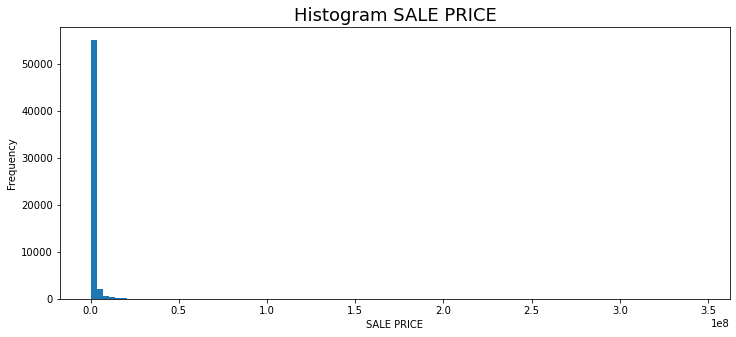

In [42]:
# Write your function below

# Graded-Funtion Begin

plt.figure(figsize=(12,5))
plt.hist(data_property['SALE PRICE'],bins=100)
plt.title('Histogram SALE PRICE', fontsize=18)
plt.xlabel('SALE PRICE')
plt.ylabel('Frequency')
plt.show


# Graded-Funtion End

Text(0, 0.5, 'Frekuensi')

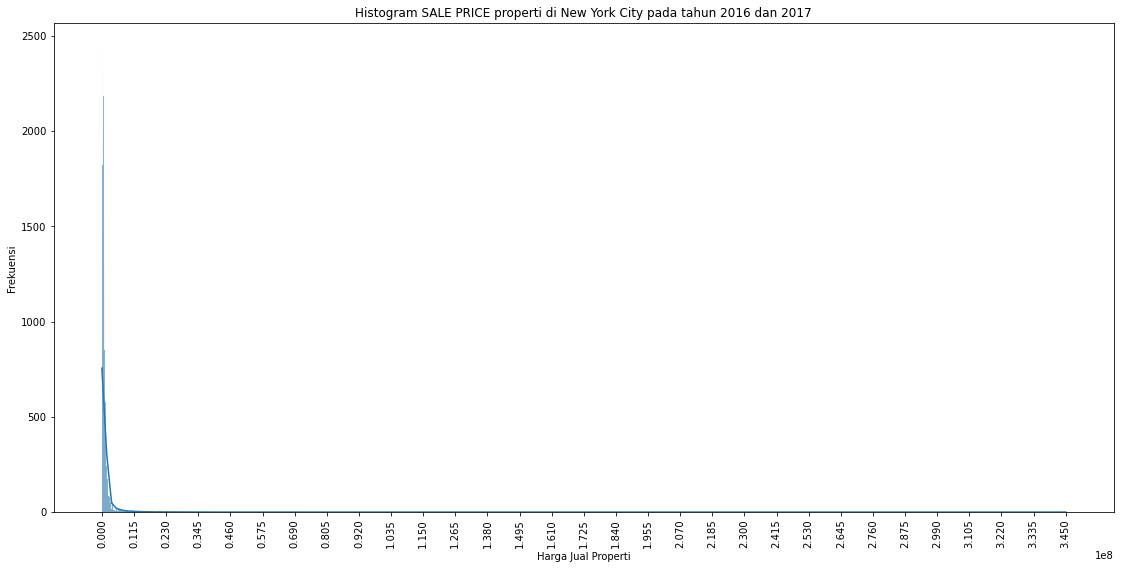

In [43]:
# Plotting for SALE PRICE
fig = plt.figure(figsize=(19,9))
ax = fig.add_subplot(1,1,1)
count, bin_edges_sale_price = np.histogram(data_property['SALE PRICE'],bins=30)
sns.histplot(data_property['SALE PRICE'],kde=True, ax=ax)
ax.set_title('Histogram SALE PRICE properti di New York City pada tahun 2016 dan 2017')
ax.set_xlabel('Harga Jual Properti')
ax.set_xticks(bin_edges_sale_price)
ax.tick_params(axis='x', labelrotation=90)
ax.set_ylabel('Frekuensi')

Now we can analyze Confidence Intervals below.

Function below are graded function. (1 Points)

In [44]:
# Write your function below

# Graded-Funtion Begin

print('Population Mean SALE PRICE = ', data_property['SALE PRICE'].mean())
print('Population Standard Deviation SALE PRICE = ', data_property['SALE PRICE'].std())

# Graded-Funtion End

Population Mean SALE PRICE =  1310019.6730936875
Population Standard Deviation SALE PRICE =  4211751.249485525


Perhitungan Central Limit Theorem

In [45]:
sample_means = [] # list yang menampung rata-rata dari sejumlah nilai acak
n = 100 # banyak nilai acak yang digunakan untuk setiap sampel nya
m = 1000

for sample in range(0,m):
    # ambil sejumlah n nilai acak dari 'SALE PRICE'
    sample_values = np.random.choice(a=data_property['SALE PRICE'], size=n)
    
    # hitung sample mean
    sample_mean = np.mean(sample_values)
    # append ke list
    sample_means.append(sample_mean)

Melihat distribusi sampel mean dari hasil Central Limit Theorem

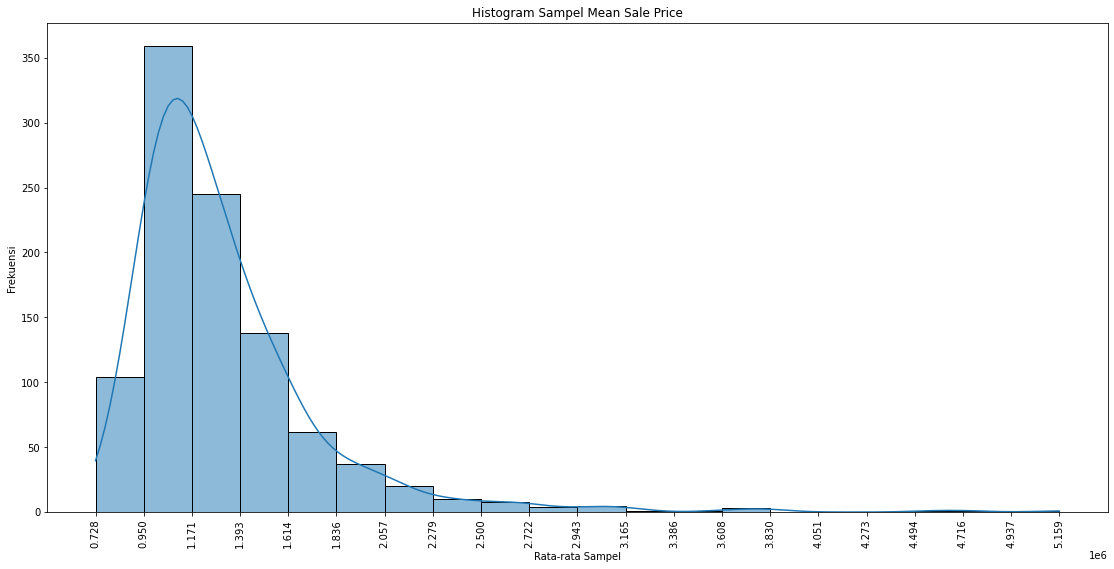

Rata rata sampel mean SALE PRICE =  1318766.6582399998
Median sampel mean SALE PRICE =  1210100.045
Standar Deviasi sampel mean SALE PRICE =  448703.1118441933


In [46]:
count, bin_edges = np.histogram(sample_means, bins=20)
fig = plt.figure(figsize=(19,9))
ax = fig.add_subplot(1,1,1)
sns.histplot(sample_means,kde=True, bins=20, ax=ax)
ax.set_title('Histogram Sampel Mean Sale Price')
ax.set_xlabel('Rata-rata Sampel')
ax.set_xticks(bin_edges)
ax.tick_params(axis='x', labelrotation=90)
ax.set_ylabel('Frekuensi')
plt.show()

sample_means_series = pd.Series(sample_means)
# hitung nilai rata-rata
print('Rata rata sampel mean SALE PRICE = ', sample_means_series.mean())
# Hitung nilai median
print('Median sampel mean SALE PRICE = ', sample_means_series.median())
# hitung standard deviasi 
print('Standar Deviasi sampel mean SALE PRICE = ', sample_means_series.std())

In [47]:
sample_means_series = pd.Series(sample_means)

# hitung nilai rata-rata
print('Rata rata sampel mean SALE PRICE = ', sample_means_series.mean())
# Hitung nilai median
print('Median sampel mean SALE PRICE = ', sample_means_series.median())
# hitung standard deviasi 
print('Standar Deviasi sampel mean SALE PRICE = ', sample_means_series.std())

Rata rata sampel mean SALE PRICE =  1318766.6582399998
Median sampel mean SALE PRICE =  1210100.045
Standar Deviasi sampel mean SALE PRICE =  448703.1118441933


Mean, Standard Deviation dari sample mean

In [48]:
mean_of_sampel_mean = np.mean(sample_means)
std_of_sampel_mean = np.std(sample_means)

# tetapkan batas critical z_score 
z_score = 1.96

Standard Error dari sample mean

In [49]:
number_of_observation = len(data_property)
standard_error_of_sampel_mean = sample_means_series.std()/np.sqrt(number_of_observation)

Menghitung batas atas dan batas bawah untuk area 95% mean sample

In [50]:
lower_bound = mean_of_sampel_mean - z_score*standard_error_of_sampel_mean
upper_bound = mean_of_sampel_mean + z_score*standard_error_of_sampel_mean
lower_bound, upper_bound

(1315130.6397394342, 1322402.6767405653)

Histogram

Text(0.5, 0, 'Sampel Mean New York Property Sales Price')

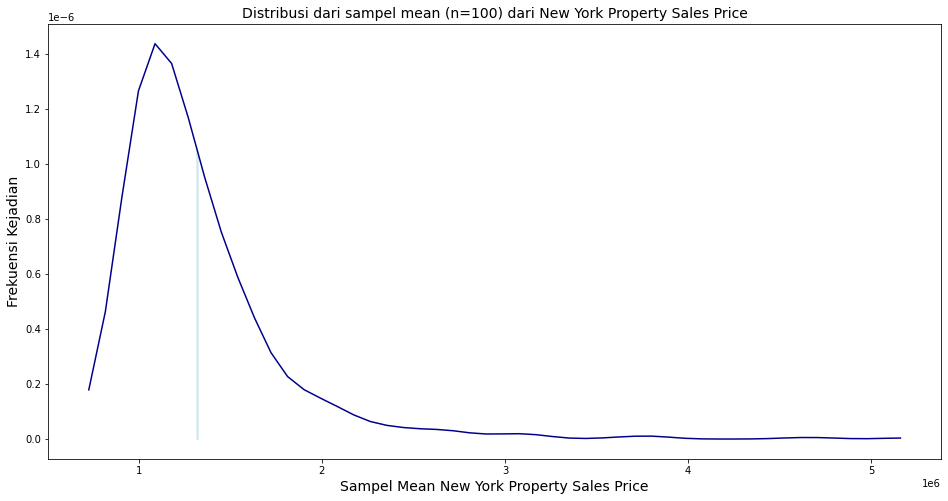

In [51]:
plt.figure(figsize=(16,8))
kde = scistats.gaussian_kde(sample_means)
pos = np.linspace(np.min(sample_means), np.max(sample_means))
plt.plot(pos,kde(pos), color='darkblue')
shade = np.linspace(lower_bound,upper_bound)
plt.fill_between(shade,kde(shade),alpha=0.45,color='lightblue')
plt.title('Distribusi dari sampel mean (n='+str(n)+') dari New York Property Sales Price', fontsize=14)
plt.ylabel('Frekuensi Kejadian', fontsize=14)
plt.xlabel('Sampel Mean New York Property Sales Price',fontsize=14)

Make your Hypothesis Testing below

Function below are graded function. (1 Points)

In [52]:
# Write your function below

# Graded-Funtion Begin

# mengambil data penjualan (SALE PRICE) untuk tahun 2016
sales_2016 = data_property[(data_property['SALE YEAR']==2016)]['SALE PRICE']

# mengambil data penjualan (SALE PRICE) untuk tahun 2017
sales_2017 = data_property[(data_property['SALE YEAR']==2017)]['SALE PRICE']

# menghitung banyak data penjualan (SALE PRICE) pada tahun 2016 dan 2017
len(sales_2016), len(sales_2017)


# Graded-Funtion End

(19817, 38686)

Text(0, 0.5, 'Frekuensi')

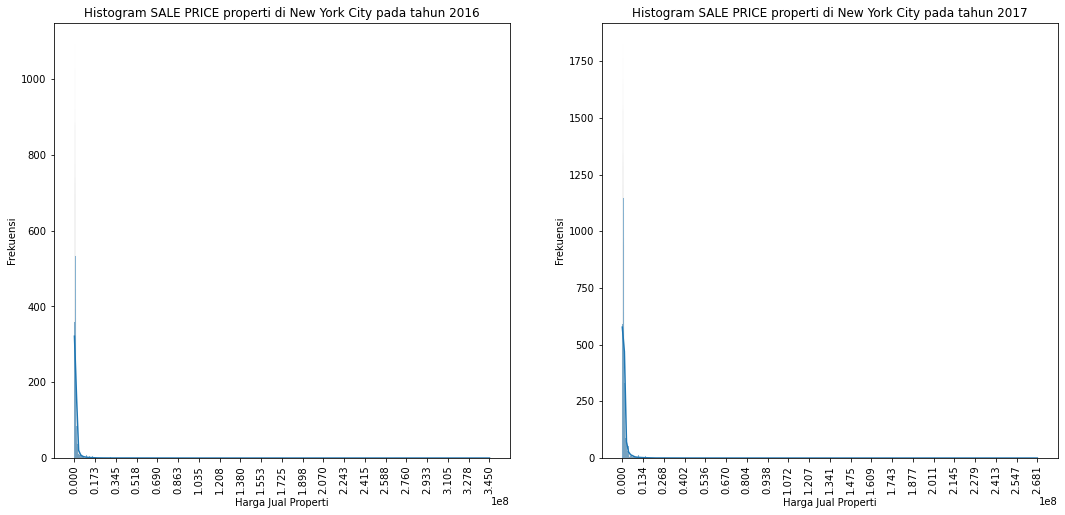

In [53]:
# menampilkan distribusi dari data penjualan 2016 dan 2017
fig = plt.figure(figsize=(18,8))
ax = fig.add_subplot(1,2,1)
ax0 = fig.add_subplot(1,2,2)

# Plotting for 2016
count, bin_edges_2016 = np.histogram(sales_2016,bins=20)
sns.histplot(sales_2016,kde=True, ax=ax)
ax.set_title('Histogram SALE PRICE properti di New York City pada tahun 2016')
ax.set_xlabel('Harga Jual Properti')
ax.set_xticks(bin_edges_2016)
ax.tick_params(axis='x', labelrotation=90)
ax.set_ylabel('Frekuensi')

# Plotting for 2017
count, bin_edges_2017 = np.histogram(sales_2017,bins=20)
sns.histplot(sales_2017, kde=True, ax=ax0)
ax0.set_title('Histogram SALE PRICE properti di New York City pada tahun 2017')
ax0.set_xlabel('Harga Jual Properti')
ax0.set_xticks(bin_edges_2017)
ax0.tick_params(axis='x', labelrotation=90)
ax0.set_ylabel('Frekuensi')

Write your final conclusion below.

Your conclusion below are graded. (1 Points)